# Notebook 2/3 Improved Models (Adding personnal features and binary posture classifier)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor

from utils.Baseline_training_utils import *
from utils.personnal_characteristics_utils import *
import os
import time
import joblib

## 0. Loading the preprocessed data saved under csv format

In [5]:
#Loading datasets with all sessions included
X_train_all = pd.read_csv('Cleaned_Datasets/Train_final.csv') 
X_test_all = pd.read_csv('Cleaned_Datasets/Test_final.csv')

# Splitting target and features
y_train_thigh = X_train_all[['thigh_flux']]
y_test_thigh = X_test_all[['thigh_flux']]

y_train_back = X_train_all[['back_flux']]
y_test_back = X_test_all[['back_flux']]

# Creating minimal dataset to be completed with selected features only
cols_to_keep = ['participant_id', 'Time','Sensor 0', 'Sensor 1', 'Sensor 2', 
                'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 
                'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12', 'chair_back_flux', 'chair_thigh_flux']

X_train = X_train_all.loc[:, cols_to_keep]
X_test = X_test_all.loc[:, cols_to_keep]

## 1. Adding personal features

Heat Flux are sensitive to personal characteristics of participants. 

In this section, we are adding the personnal features to our baseline models to see if they can improve them or not.

### Personnal Characteristics Features Added

| Column     | Meaning                              | Relevance for Heat Flux Prediction |
|------------|----------------------------------------|------------------------------------|
| Sex        | Biological sex                         | Differences in thermoregulation |
| Height     | Body height (cm)                       | Influences body surface area and heat exchange |
| Waist      | Waist circumference                    | Reflects body composition and insulation |
| Weight     | Total body weight                      | Correlated with fat and muscle mass, affects heat transfer |
| FFM        | Fat-Free Mass                          | Influences metabolic heat production |
| SMM        | Skeletal Muscle Mass                   | Muscle generates heat |
| ICW        | Intracellular Water                    | Related to muscle activity and metabolism |
| ECW        | Extracellular Water                    | Related to hydration and thermal distribution |
| BMI        | Body Mass Index                        | Global indicator of body size and insulation |
| PBF        | Percentage Body Fat                    | Fat acts as thermal insulation |
| BMR        | Basal Metabolic Rate                   | Reflects resting heat production |
| Age        | Participant age                        | Thermoregulation varies with age |
| TW         | Total Body Water                       | Related to hydration and thermoregulation |
| ECW_R      | Ratio of Extracellular Water to Total Water | Indicator of hydration, impacts thermal transfer |


### 1.A Adding the personal features to the dataset

In [6]:
X_train_perso = add_personal_characteristics(X_train)
X_test_perso = add_personal_characteristics(X_test)

### 1.B Training Ridge, Lasso and RandomForest regressor models with personal features: one for the thigh flux and one for the back flux

#### 1.B.1 Ridge with personnal features

In [ ]:
# Setting up Ridge regression pipeline with scaling included
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

# Setting up hyperparameter grid for Ridge regression
ridge_params = {
    "ridge__alpha": [10.0, 100.0, 150.0, 200.0, 250.0, 300.0, 1000.0, 5000.0, 10000.0, 20000.0, 50000.0, 100000.0, 500000.0]
}

In [ ]:
# Training Ridge model for thigh flux with personal features
bundle_ridge = cv_select_and_refit_on_full_train(
    X_train=X_train_perso,
    y_train=y_train_thigh,              # DataFrame (n,1)
    base_estimator=ridge_model,
    param_grid=ridge_params,
    model_name="Ridge_Thigh_perso",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Ridge_Thigh_perso",
)


[Ridge_Thigh_perso] Launching...
[Ridge_Thigh_perso] #param combinations: 13 | outer folds: 5
  Combo 1/13: {'ridge__alpha': 10.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 101.7317 ± 143.9888
  Combo 2/13: {'ridge__alpha': 100.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 44.6225 ± 48.3513
  Combo 3/13: {'ridge__alpha': 150.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 39.1852 ± 39.5025
  Combo 4/13: {'ridge__alpha': 200.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 35.6301 ± 33.5818
  Combo 5/13: {'ridge__alpha': 250.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 33.0534 ± 29.2256
  Combo 6/13: {'ridge__alpha': 300.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 31.0736 ± 25.8502
  Combo 7/13: {'ridge__alpha': 1000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 21.3766 ± 9.1978
  Combo 8/13: {'ridge__alpha': 5000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 16.7293 ± 1.9256
  Combo 9/13: {'ridge__alpha': 10000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 16.2915 ± 1.6226
  Combo 10/13: {'ridge__alpha': 20000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 16.1163 ± 1.6254
  Combo 11/13: {'ridge__alpha': 50000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 15.9953 ± 1.7595
  Combo 12/13: {'ridge__alpha': 100000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 15.9652 ± 1.9431
  Combo 13/13: {'ridge__alpha': 500000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 16.0527 ± 2.4694

[Ridge_Thigh_perso] BEST params = {'ridge__alpha': 100000.0}
[Ridge_Thigh_perso] BEST MAE = 15.9652


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base


[SAVE] bundle -> runs/Ridge_Thigh_perso.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


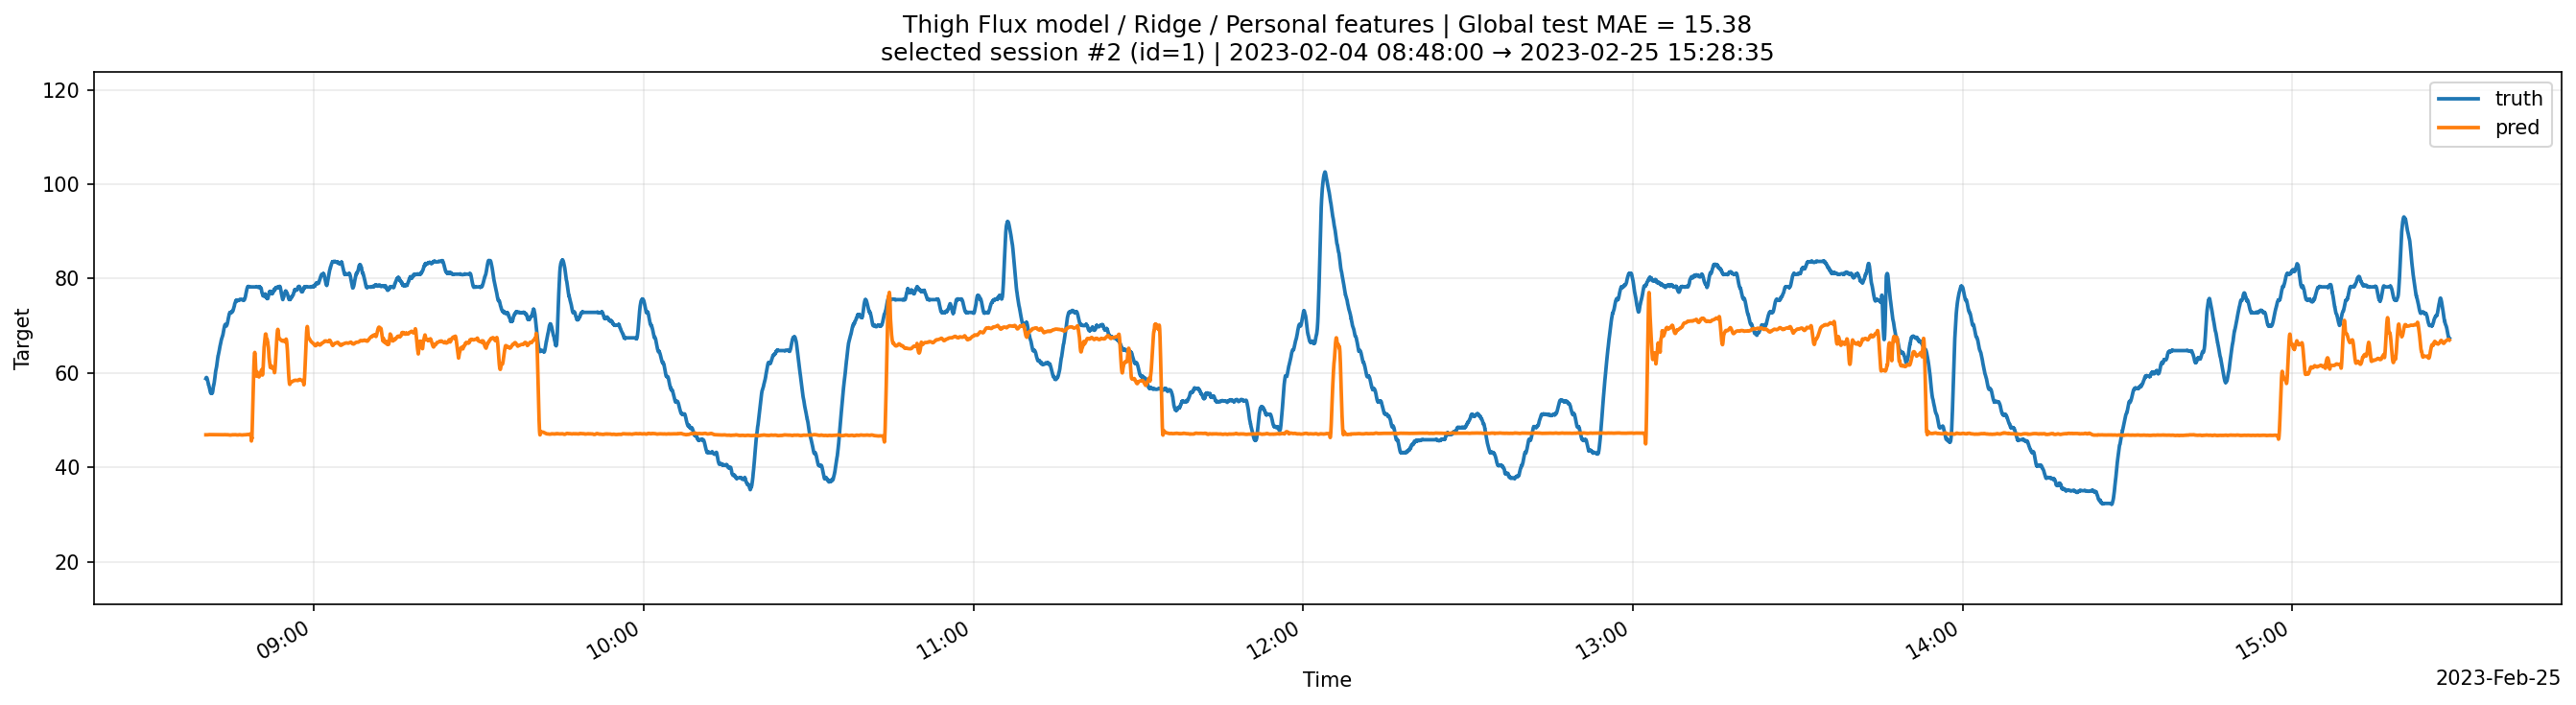

In [7]:
# Loading and evaluating the trained Ridge model for thigh flux with personal features

bundle_ridge__thigh_perso = joblib.load('runs/Ridge_Thigh_perso.joblib')
pred_ridge = predict_and_plot(bundle_ridge__thigh_perso['model'], X_test_perso, y_test_thigh, mode="selected", 
                              title = 'Thigh Flux model / Ridge / Personal features')

In [ ]:
# Training Ridge model for back flux with personal features

bundle_ridge_back_perso = cv_select_and_refit_on_full_train(
    X_train=X_train_perso,
    y_train=y_train_back,              # DataFrame (n,1)
    base_estimator=ridge_model,
    param_grid=ridge_params,
    model_name="Ridge_Back_perso",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Ridge_Back_perso",
)


[Ridge_Back_perso] Launching...
[Ridge_Back_perso] #param combinations: 13 | outer folds: 5
  Combo 1/13: {'ridge__alpha': 10.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 82.7277 ± 103.1538
  Combo 2/13: {'ridge__alpha': 100.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 26.3228 ± 15.3739
  Combo 3/13: {'ridge__alpha': 150.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 22.3186 ± 11.0107
  Combo 4/13: {'ridge__alpha': 200.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 19.9498 ± 8.6317
  Combo 5/13: {'ridge__alpha': 250.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 18.5109 ± 7.2494
  Combo 6/13: {'ridge__alpha': 300.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 17.9210 ± 6.3450
  Combo 7/13: {'ridge__alpha': 1000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 18.5634 ± 5.4647
  Combo 8/13: {'ridge__alpha': 5000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 19.1128 ± 6.0992
  Combo 9/13: {'ridge__alpha': 10000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 18.5566 ± 5.0054
  Combo 10/13: {'ridge__alpha': 20000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 17.6962 ± 3.5903
  Combo 11/13: {'ridge__alpha': 50000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 16.5989 ± 2.2297
  Combo 12/13: {'ridge__alpha': 100000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 15.9323 ± 1.7064
  Combo 13/13: {'ridge__alpha': 500000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 15.0016 ± 1.5581

[Ridge_Back_perso] BEST params = {'ridge__alpha': 500000.0}
[Ridge_Back_perso] BEST MAE = 15.0016


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base


[SAVE] bundle -> runs/Ridge_Back_perso.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


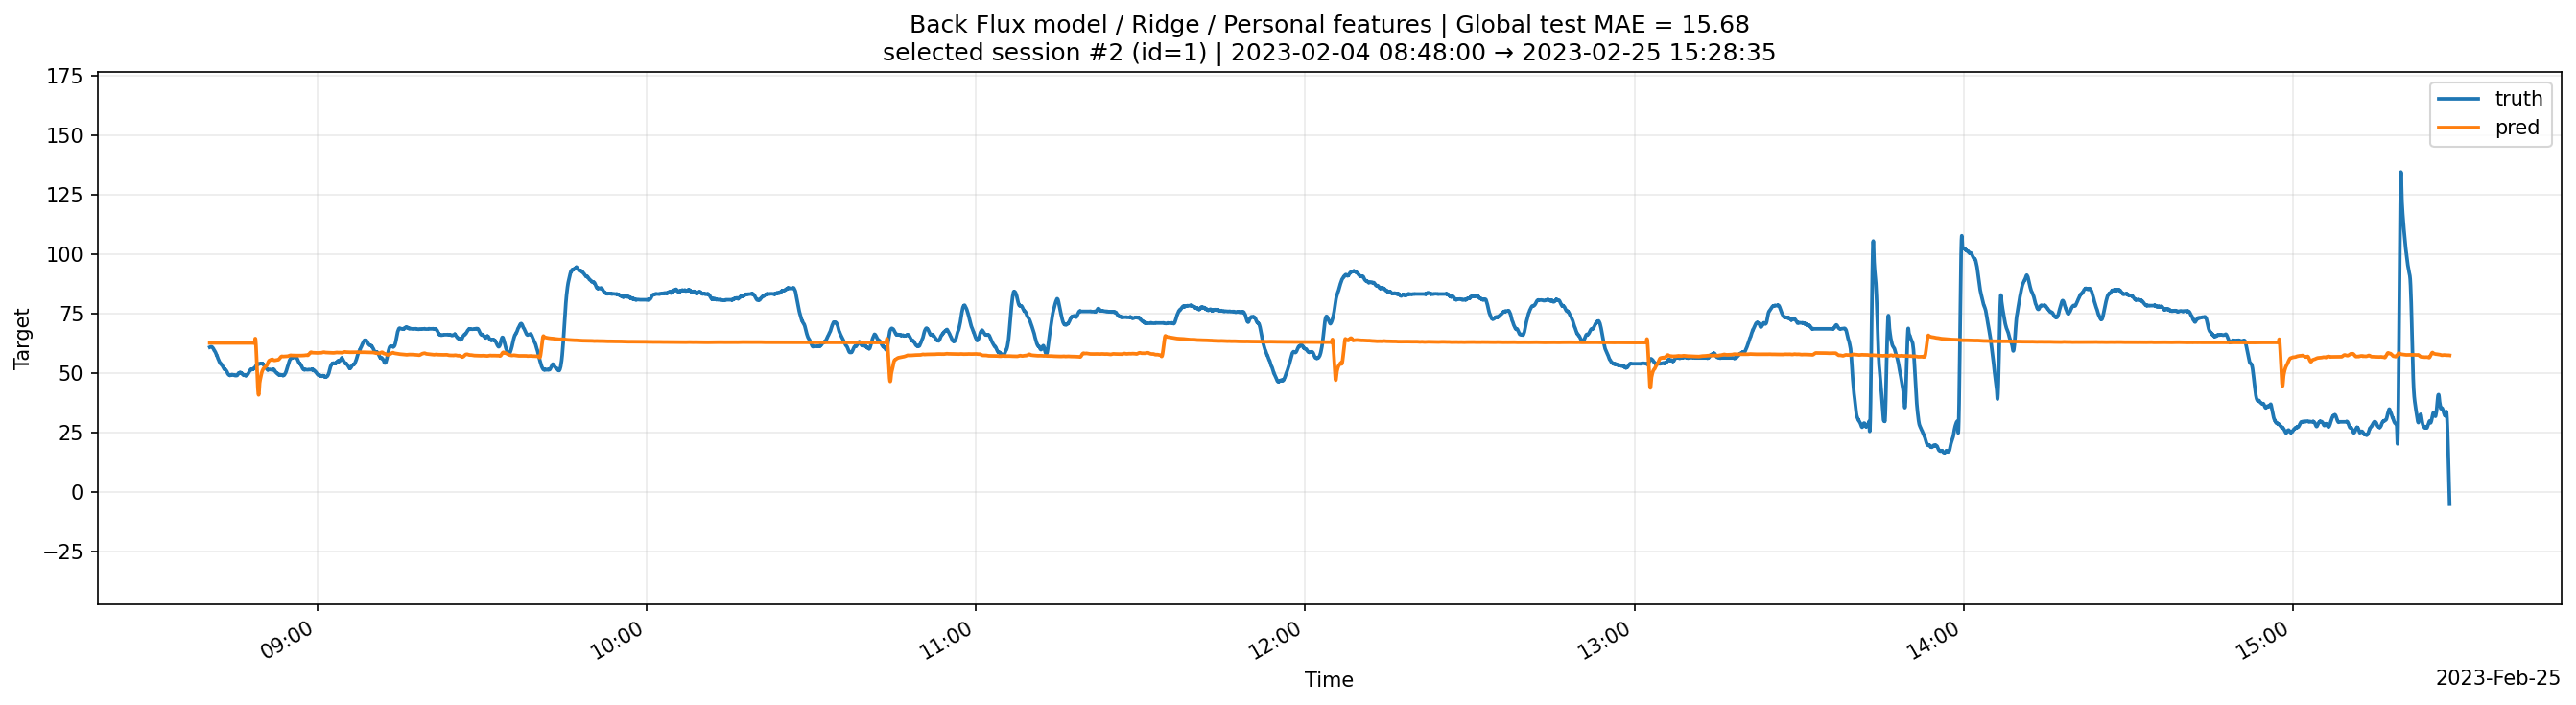

In [ ]:
bundle_ridge__back_perso = joblib.load('runs/Ridge_Back_perso.joblib')

pred_ridge = predict_and_plot(bundle_ridge__back_perso['model'], X_test_perso, y_test_back, mode="selected", 
                              title = 'Back Flux model / Ridge / Personal features')

#### 1.B.2 Lasso with personal features

In [23]:
lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(max_iter=10_000))
])

lasso_params = {
    "lasso__alpha": [0.45, 0.5, 0.55, 0.6]  
}

In [138]:
# Training Ridge model for thigh flux with personal features
bundle_lasso = cv_select_and_refit_on_full_train(
    X_train=X_train_perso,
    y_train=y_train_thigh,              # DataFrame (n,1)
    base_estimator=lasso_model,
    param_grid=lasso_params,
    model_name="Lasso_Thigh_perso",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Lasso_Thigh_perso",
)


[Lasso_Thigh_perso] Launching...
[Lasso_Thigh_perso] #param combinations: 4 | outer folds: 5
  Combo 1/4: {'lasso__alpha': 0.45}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.6222 ± 1.5406
  Combo 2/4: {'lasso__alpha': 0.5}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.6206 ± 1.5738
  Combo 3/4: {'lasso__alpha': 0.55}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.6214 ± 1.6082
  Combo 4/4: {'lasso__alpha': 0.6}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.6237 ± 1.6430

[Lasso_Thigh_perso] BEST params = {'lasso__alpha': 0.5}
[Lasso_Thigh_perso] BEST MAE = 15.6206


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 


[SAVE] bundle -> runs/Lasso_Thigh_perso.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


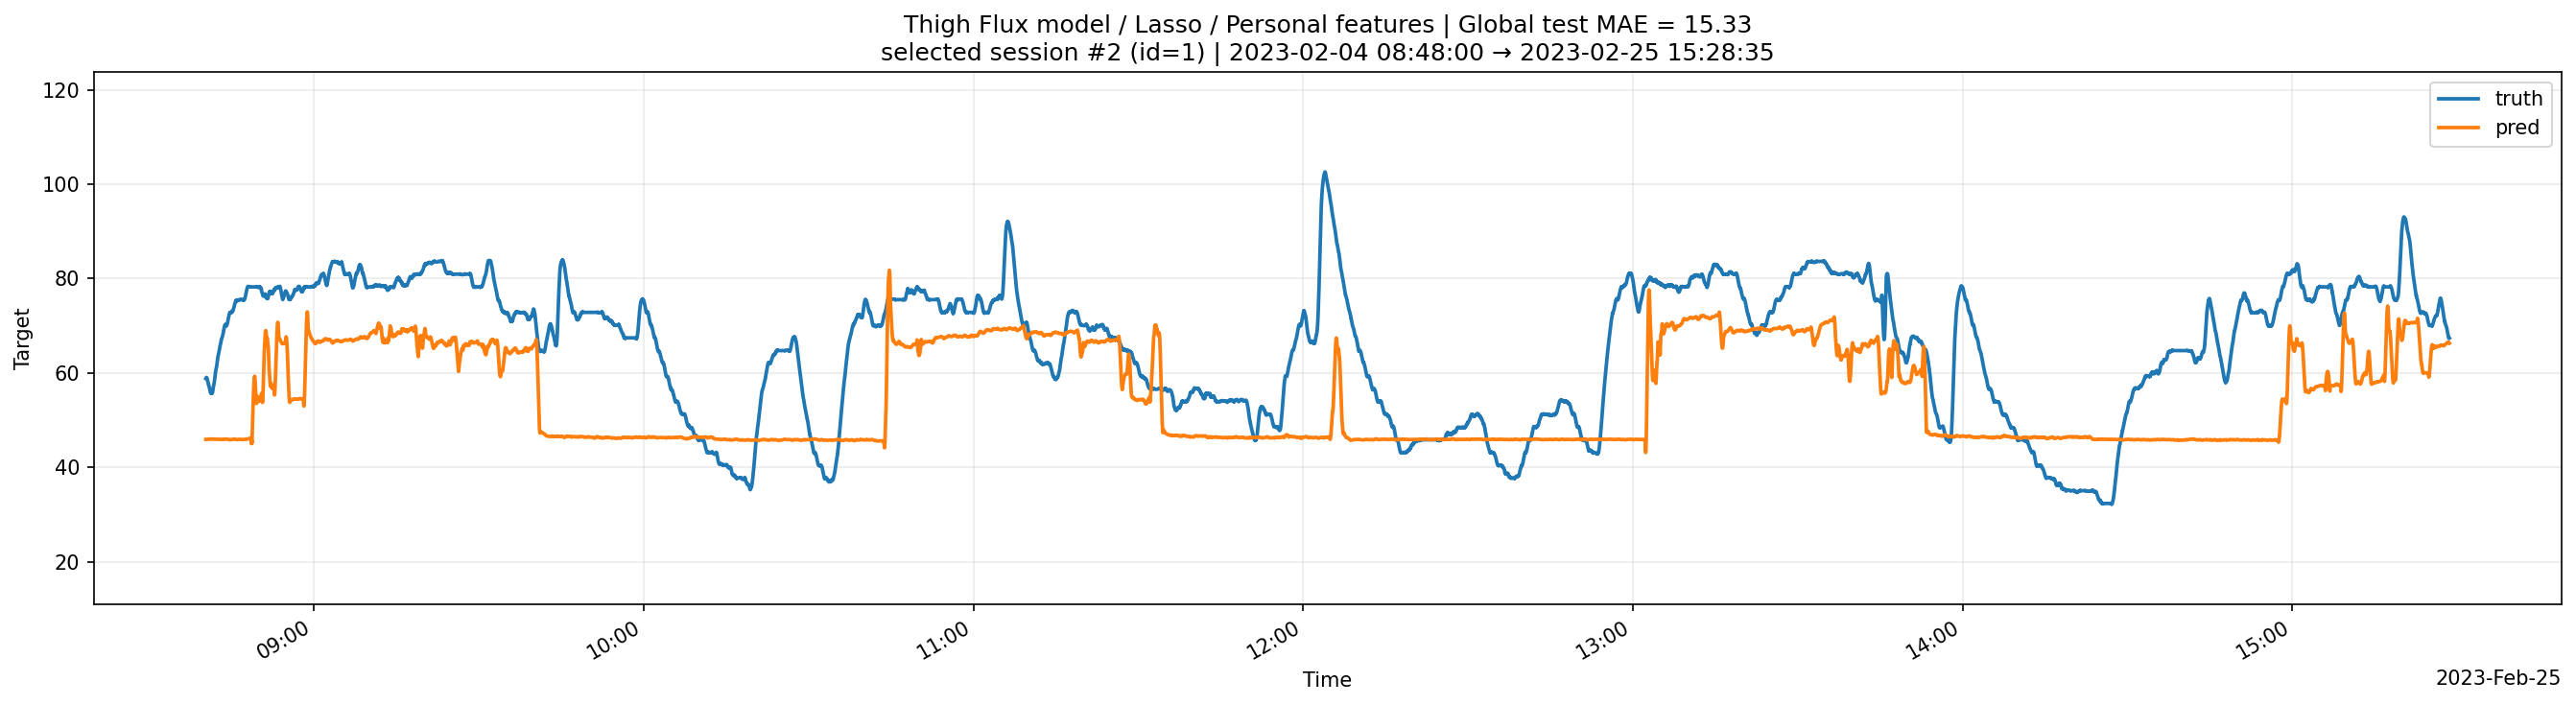

In [9]:
# Loading and evaluating the trained Lasso model for thigh flux with personal features

bundle_lasso__thigh_perso = joblib.load('runs/Lasso_Thigh_perso.joblib')
pred_lasso = predict_and_plot(bundle_lasso__thigh_perso['model'], X_test_perso, y_test_thigh, mode="selected", 
                              title = 'Thigh Flux model / Lasso / Personal features')

In [140]:
# Training Ridge model for thigh flux with personal features
bundle_lasso = cv_select_and_refit_on_full_train(
    X_train=X_train_perso,
    y_train=y_train_back,              # DataFrame (n,1)
    base_estimator=lasso_model,
    param_grid=lasso_params,
    model_name="Lasso_Back_perso",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Lasso_Back_perso",
)


[Lasso_Back_perso] Launching...
[Lasso_Back_perso] #param combinations: 4 | outer folds: 5
  Combo 1/4: {'lasso__alpha': 0.45}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.2844 ± 1.6109
  Combo 2/4: {'lasso__alpha': 0.5}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.2277 ± 1.6337
  Combo 3/4: {'lasso__alpha': 0.55}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.1839 ± 1.6526
  Combo 4/4: {'lasso__alpha': 0.6}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std over folds: 15.1399 ± 1.6682

[Lasso_Back_perso] BEST params = {'lasso__alpha': 0.6}
[Lasso_Back_perso] BEST MAE = 15.1399


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 


[SAVE] bundle -> runs/Lasso_Back_perso.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


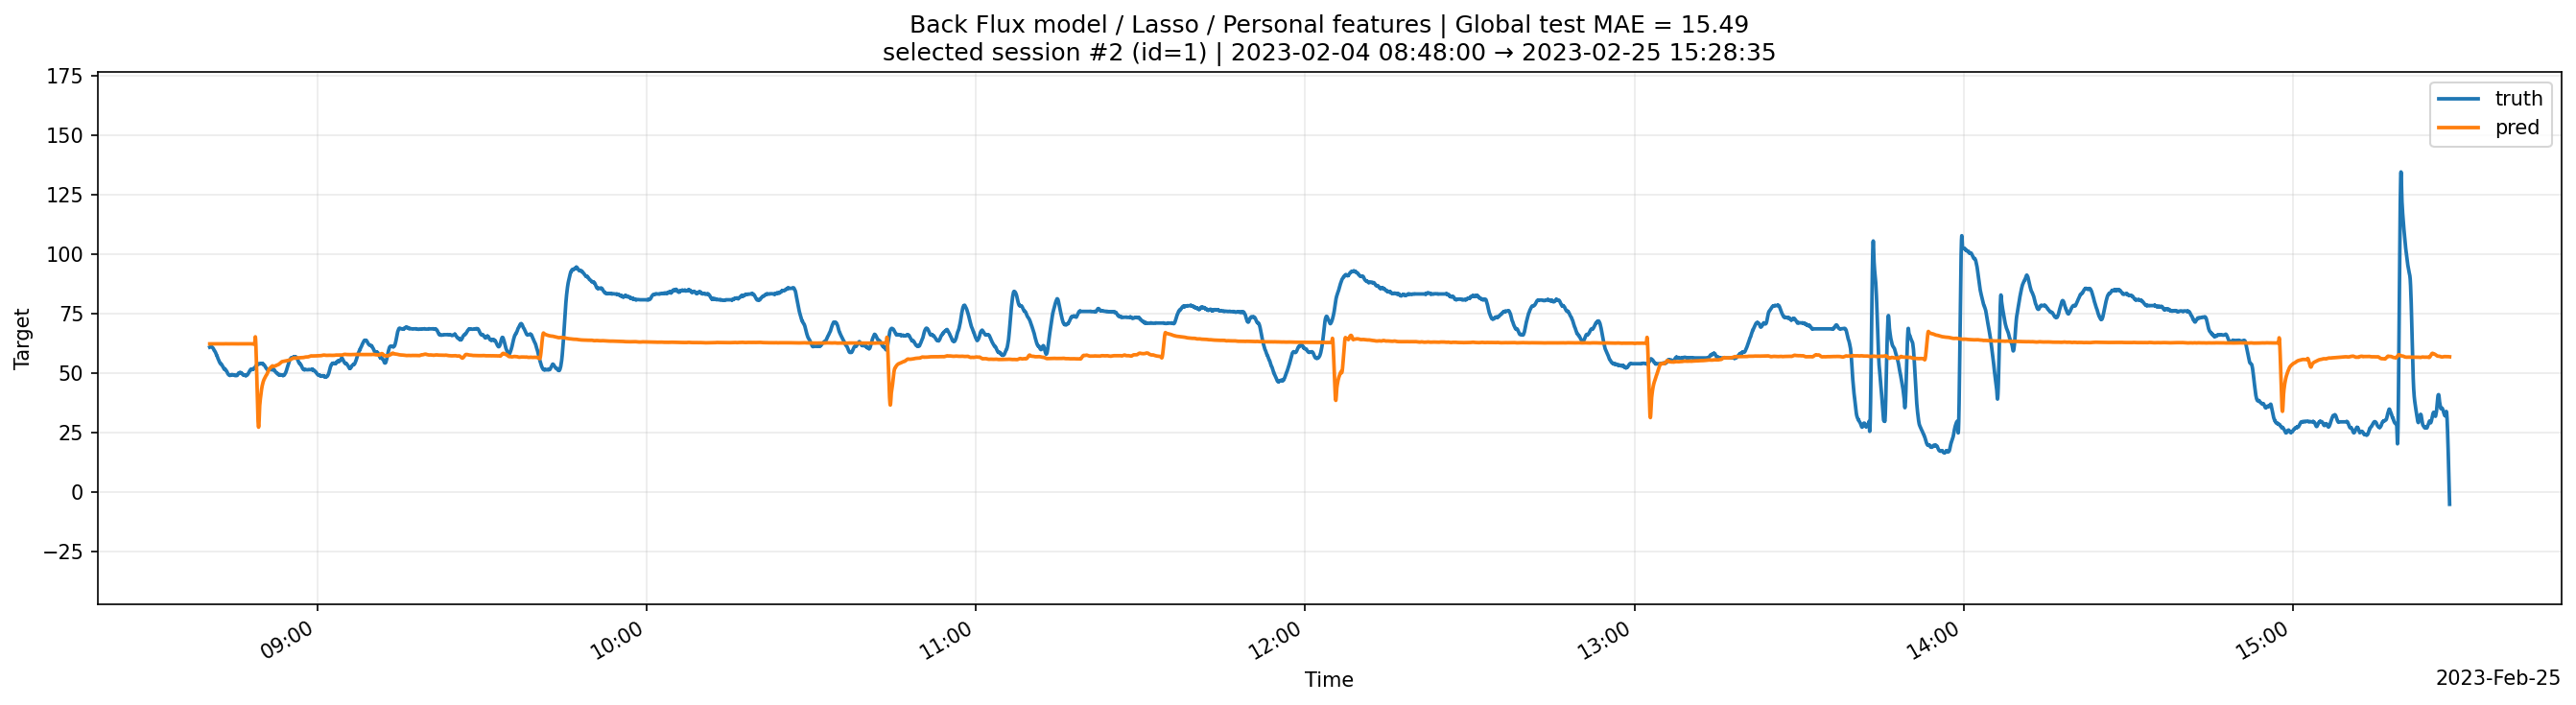

In [10]:
# Loading and evaluating the trained Lasso model for back flux with personal features

bundle_lasso__back_perso = joblib.load('runs/Lasso_Back_perso.joblib')
pred_lasso = predict_and_plot(bundle_lasso__back_perso['model'], X_test_perso, y_test_back, mode="selected", 
                              title = 'Back Flux model / Lasso / Personal features')

# 2. Adding a binary posture classifier

### 2.1 Implementing the binary posture classifier

In [14]:
# Defining seated sessions 0 (not seated) and 1 (seated)
sessions_seated = [1, 2, 3, 4]

X_train_all["is_seated"] = X_train_all["Session"].isin(sessions_seated).astype(int)
print(X_train_all["is_seated"].value_counts())

is_seated
0    289489
1    234970
Name: count, dtype: int64


In [15]:
# Creating feature matrix X and target vector y
sensor_names = [f"Sensor {i}" for i in [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12]]

X = X_train_all[sensor_names].copy()
y = X_train_all["is_seated"].copy()

In [16]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

print("Train:", X_train.shape, "Val:", X_val.shape)

Train: (419567, 12) Val: (104892, 12)


In [ ]:
# CV to select best hyperparams (F1 score)
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Hyperparameter grid
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [10, 20, 40],
}

# Performing grid search
search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1,
    verbose=1,
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)

# Refit on full train with best params 
best_rf = RandomForestClassifier(
    **search.best_params_,
    random_state=0,
    n_jobs=-1,
)
best_rf.fit(X_train, y_train)

# Evaluation on validation set
y_pred = best_rf.predict(X_val)
print("Val F1:", f1_score(y_val, y_pred))

In [ ]:
# Saving the binary classifier model in order to apply it for other models
joblib.dump(best_rf, 'runs/Seated_Classifier.joblib')


['runs/Seated_Classifier.joblib']

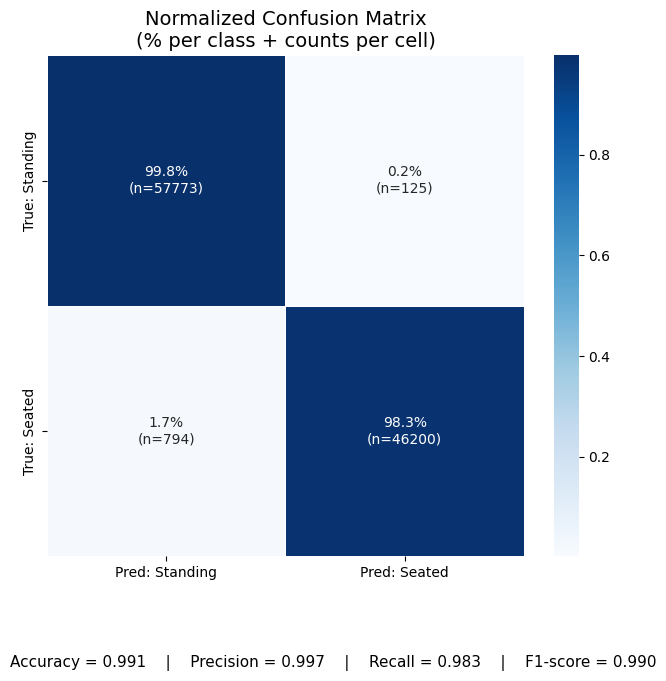

In [66]:
plot_confusion_matrix_and_scores(y_val, y_pred)

### 2.2 Now let's apply this binary classifier to our test dataset in order to simulate real time filtering of non-seated moments

In [26]:
best_rf = joblib.load('runs/Seated_Classifier.joblib')

X_test_seated = X_test_all.copy()
X_test_seated['Seated'] = best_rf.predict(X_test_all[sensor_names])

length_before = len(X_test_seated)

# Filtering to keep only predicted seated data points
X_test_seated = X_test_seated[X_test_seated['Seated'] == 1]
y_test_thigh_seated = X_test_seated[['thigh_flux']]
y_test_back_seated = X_test_seated[['back_flux']]

length_after = len(X_test_seated)

X_test_seated = X_test_seated.loc[:, cols_to_keep]

# Adding personal characteristics
X_test_seated_perso = add_personal_characteristics(X_test_seated)

print(f"Proportion of data points kept in test (rows where participant is predicted seated): {length_after/ length_before:.3f} %")

Proportion of data points kept in test (rows where participant is predicted seated): 0.456 %


### 2.3 Training models (Ridge, Lasso, RandomForest) with only sitting training data

### 2.3.1.a Ridge Model (thigh heat flux)

In [ ]:
# Keeping only seated sessions in training set
X_train_seated = X_train_all[X_train_all['Session'] != 0]

# Creating target vectors for seated training set
y_train_thigh_seated = X_train_seated[['thigh_flux']]
y_train_back_seated = X_train_seated[['back_flux']]

X_train_seated = X_train_seated.loc[:, cols_to_keep]

X_train_seated_perso = add_personal_characteristics(X_train_seated)
X_train_seated_perso["Sex"] = X_train_seated_perso["Sex"].map({"F": 0, "M": 1})


In [ ]:
# Training ridge thigh model on seated data only
bundle_ridge_seated = cv_select_and_refit_on_full_train(
    X_train=X_train_seated_perso,
    y_train=y_train_thigh_seated,              # DataFrame (n,1)
    base_estimator=ridge_model,
    param_grid=ridge_params,
    model_name="Ridge_Thigh_seated",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Ridge_Thigh_seated",
)


[Ridge_Thigh_seated] Launching...
[Ridge_Thigh_seated] #param combinations: 13 | outer folds: 5
  Combo 1/13: {'ridge__alpha': 10.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 34.1177 ± 16.4392
  Combo 2/13: {'ridge__alpha': 100.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 20.7075 ± 8.5789
  Combo 3/13: {'ridge__alpha': 150.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 19.3752 ± 9.4094
  Combo 4/13: {'ridge__alpha': 200.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 18.9122 ± 9.8557
  Combo 5/13: {'ridge__alpha': 250.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 18.7878 ± 10.0713
  Combo 6/13: {'ridge__alpha': 300.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 18.8030 ± 10.1708
  Combo 7/13: {'ridge__alpha': 1000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 19.2961 ± 10.4166
  Combo 8/13: {'ridge__alpha': 5000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 18.0638 ± 8.9503
  Combo 9/13: {'ridge__alpha': 10000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 16.7166 ± 7.1283
  Combo 10/13: {'ridge__alpha': 20000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 15.2292 ± 5.0281
  Combo 11/13: {'ridge__alpha': 50000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 13.7666 ± 3.0141
  Combo 12/13: {'ridge__alpha': 100000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 13.5015 ± 2.7602
  Combo 13/13: {'ridge__alpha': 500000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 13.7400 ± 2.7364

[Ridge_Thigh_seated] BEST params = {'ridge__alpha': 100000.0}
[Ridge_Thigh_seated] BEST MAE = 13.5015


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base


[SAVE] bundle -> runs/Ridge_Thigh_seated.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


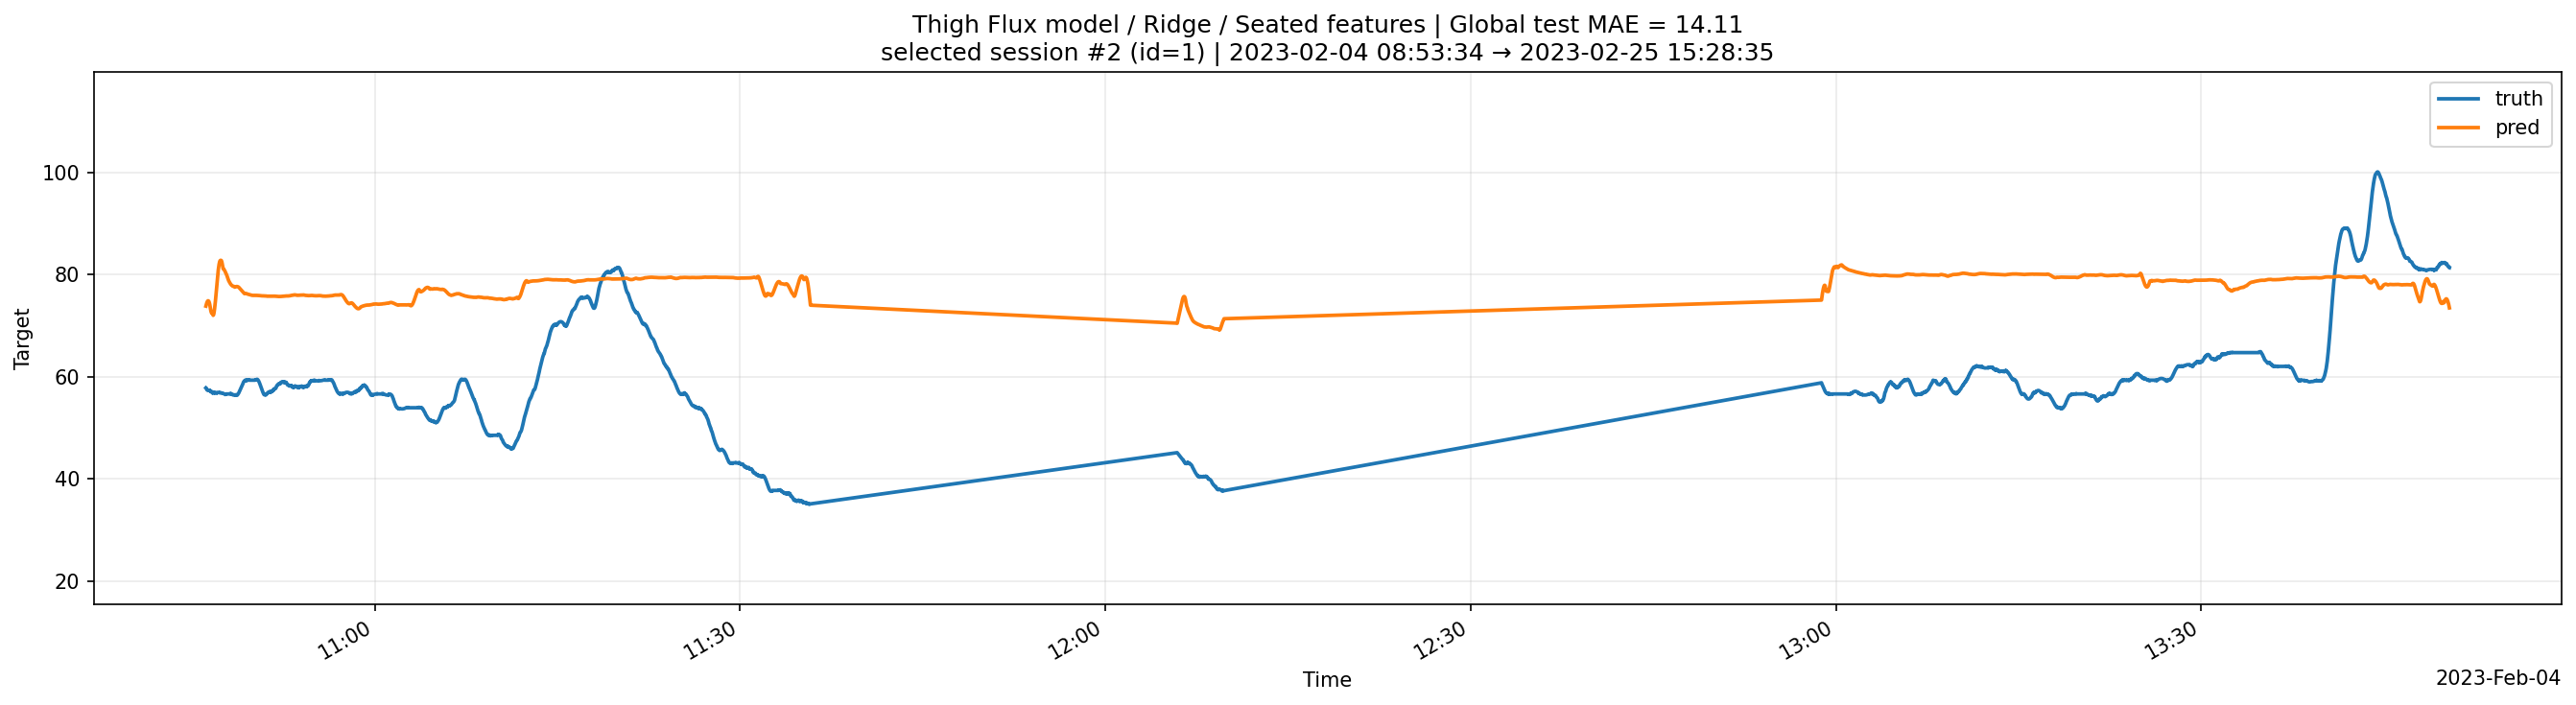

In [18]:
bundle_ridge_thigh_seated = joblib.load('runs/Ridge_Thigh_seated.joblib')

pred_ridge = predict_and_plot(bundle_ridge_thigh_seated['model'], X_test_seated_perso, y_test_thigh_seated, mode="selected", 
                              title = 'Thigh Flux model / Ridge / Seated features')

### 2.3.1.b Ridge Model (back heat flux)

In [109]:
# training models on seated data only
bundle_ridge_seated = cv_select_and_refit_on_full_train(
    X_train=X_train_seated_perso,
    y_train=y_train_back_seated,              # DataFrame (n,1)
    base_estimator=ridge_model,
    param_grid=ridge_params,
    model_name="Ridge_Back_seated",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Ridge_Back_seated",
)


[Ridge_Back_seated] Launching...
[Ridge_Back_seated] #param combinations: 13 | outer folds: 5
  Combo 1/13: {'ridge__alpha': 10.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 49.0140 ± 31.9212
  Combo 2/13: {'ridge__alpha': 100.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 33.0131 ± 22.5230
  Combo 3/13: {'ridge__alpha': 150.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 31.3732 ± 22.4588
  Combo 4/13: {'ridge__alpha': 200.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 30.4825 ± 22.4756
  Combo 5/13: {'ridge__alpha': 250.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 29.9306 ± 22.4853
  Combo 6/13: {'ridge__alpha': 300.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 29.5483 ± 22.4840
  Combo 7/13: {'ridge__alpha': 1000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 27.7527 ± 21.7243
  Combo 8/13: {'ridge__alpha': 5000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 24.3309 ± 16.5421
  Combo 9/13: {'ridge__alpha': 10000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 22.0362 ± 12.7639
  Combo 10/13: {'ridge__alpha': 20000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 19.6332 ± 8.8467
  Combo 11/13: {'ridge__alpha': 50000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 16.9516 ± 4.6150
  Combo 12/13: {'ridge__alpha': 100000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 15.5667 ± 2.6038
  Combo 13/13: {'ridge__alpha': 500000.0}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

    MAE mean/std over folds: 14.6195 ± 1.6271

[Ridge_Back_seated] BEST params = {'ridge__alpha': 500000.0}
[Ridge_Back_seated] BEST MAE = 14.6195


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base


[SAVE] bundle -> runs/Ridge_Back_seated.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base

/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


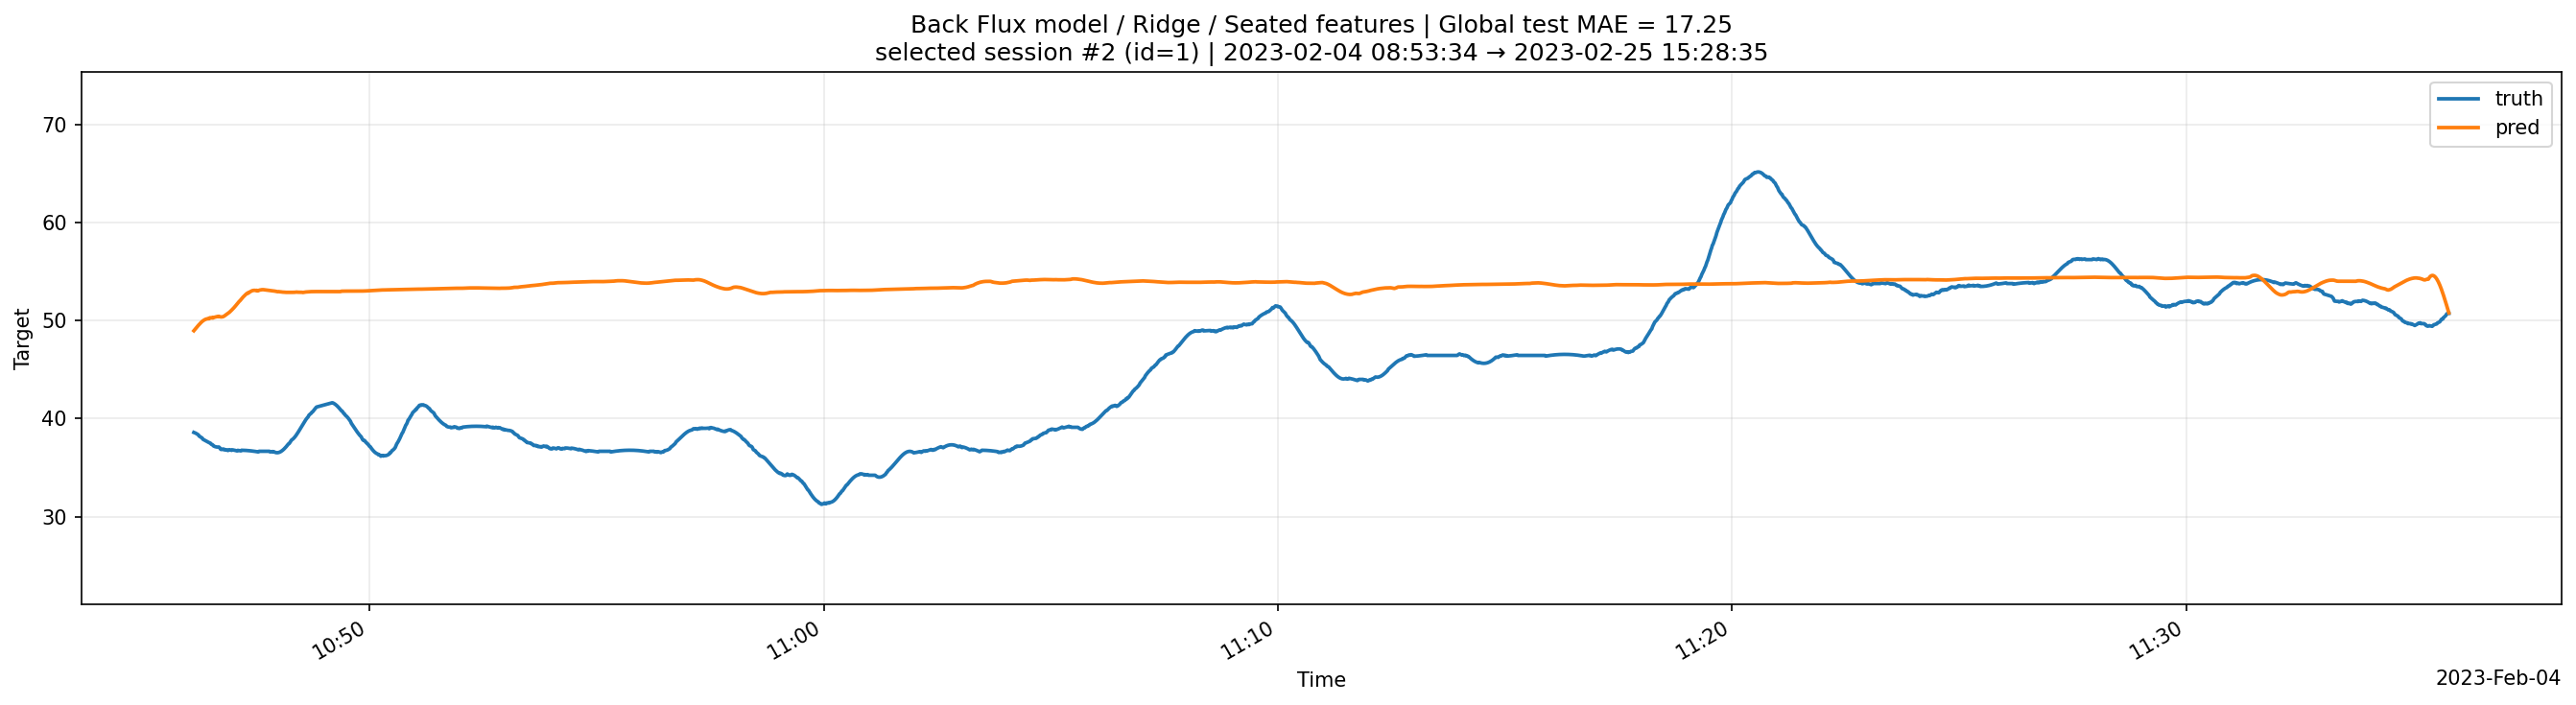

In [151]:
bundle_ridge_back_seated = joblib.load('runs/Ridge_Back_seated.joblib')

pred_ridge = predict_and_plot(bundle_ridge_back_seated['model'], 
                              X_test_seated_perso, y_test_back_seated, 
                              mode="selected", 
                              title = 'Back Flux model / Ridge / Seated features', 
                              participant_id='F7', 
                              session_number=2,
                              gap_minutes=5
                              )

We conjecture that the models are underfitting, so we will now implement more complex non-linear models, starting by a Random Forest Regressor. We will then implement XGBoost models and LSTM models.


### 2.3.2.a Random Forest Regressor (thigh heat flux)

In [117]:
rf_model = Pipeline([
    ("rf", RandomForestRegressor(
        random_state=0,
        n_jobs=-1
    ))
])

rf_params = {
    "rf__n_estimators": [200, 400],
    "rf__max_depth": [10, 30],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2],
    "rf__max_features": ["sqrt", "log2"],
}

In [ ]:
# training models on seated data only
bundle_RF_seated = cv_select_and_refit_on_full_train(
    X_train=X_train_seated_perso,
    y_train=y_train_thigh_seated,              # DataFrame (n,1)
    base_estimator=rf_model,
    param_grid=rf_params,
    model_name="RF_Thigh_seated",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="RF_Thigh_seated",
)

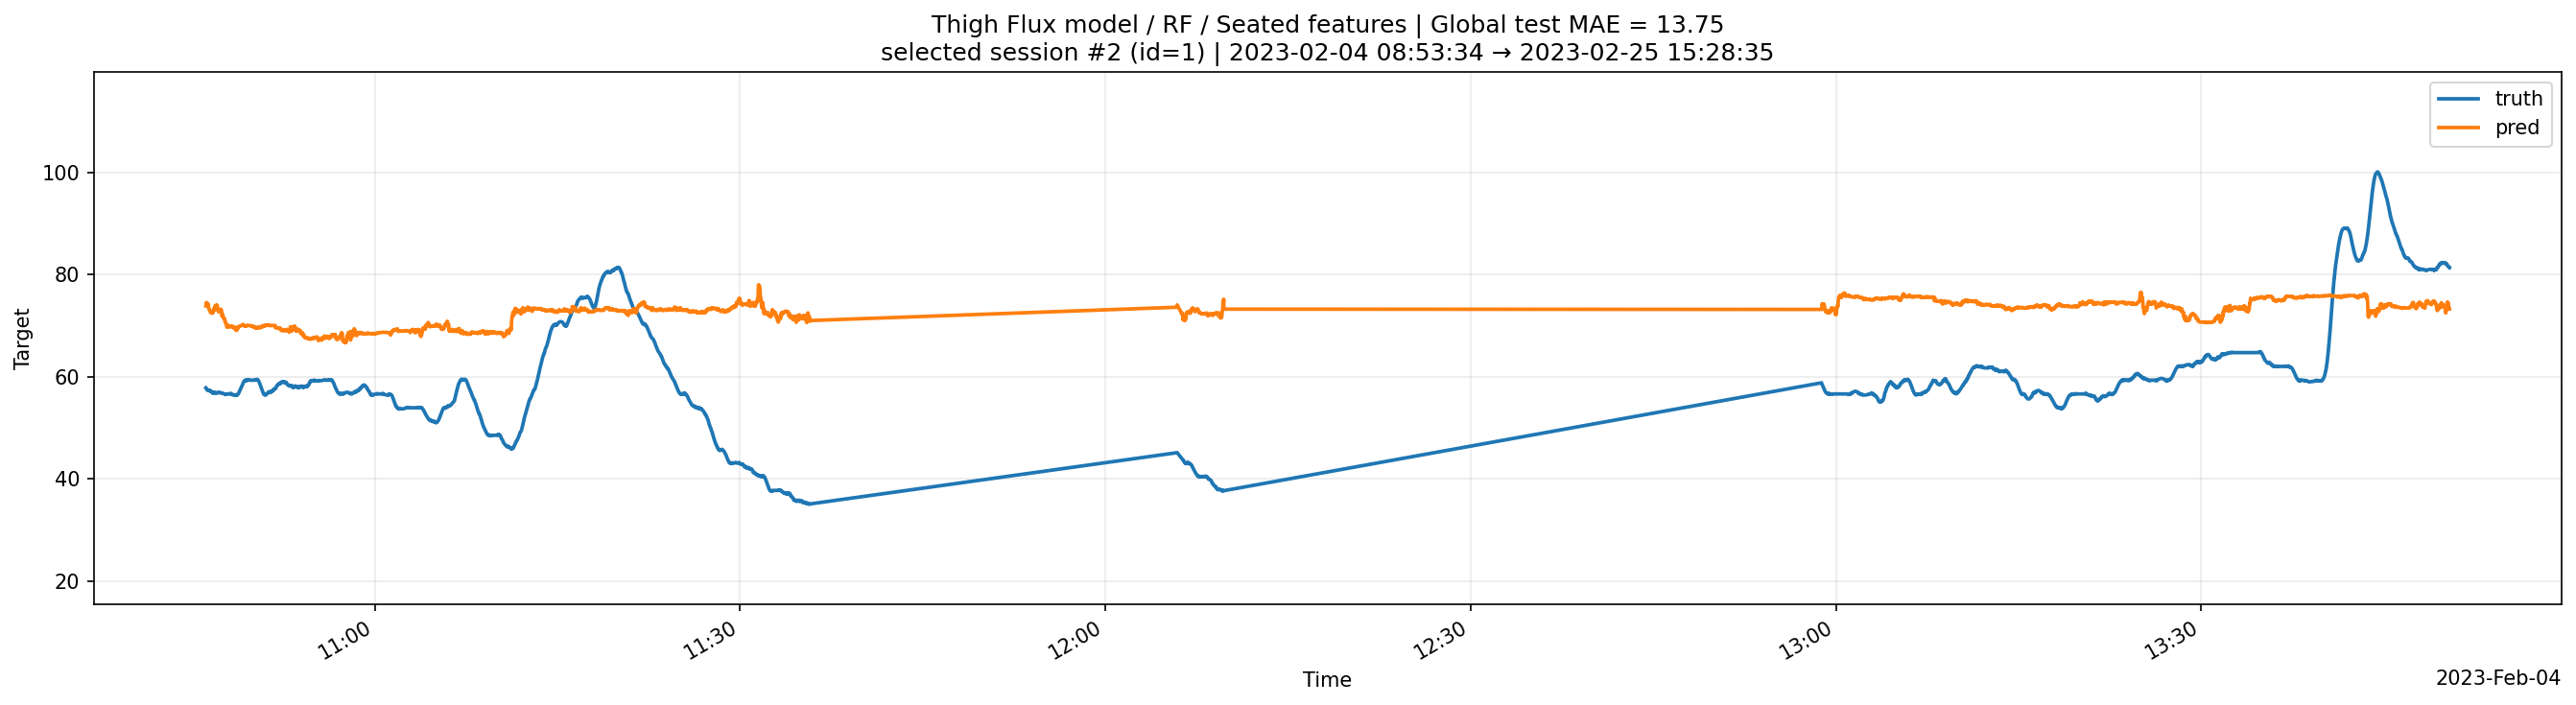

In [19]:
bundle_rf_thigh_seated = joblib.load('runs/RF_Thigh_seated.joblib')

pred_rf = predict_and_plot(bundle_rf_thigh_seated['model'], X_test_seated_perso, y_test_thigh_seated, 
                           mode="selected", title = 'Thigh Flux model / RF / Seated features')

### 2.3.2.b Random Forest Regressor (back heat flux)

In [121]:
# training models on seated data only
bundle_RF_seated = cv_select_and_refit_on_full_train(
    X_train=X_train_seated_perso,
    y_train=y_train_back_seated,              # DataFrame (n,1)
    base_estimator=rf_model,
    param_grid=rf_params,
    model_name="RF_Back_seated",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="RF_Back_seated",
)


[RF_Back_seated] Launching...
[RF_Back_seated] #param combinations: 32 | outer folds: 5
  Combo 1/32: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
    MAE mean/std over folds: 14.8406 ± 2.1540
  Combo 2/32: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
    MAE mean/std over folds: 14.7638 ± 2.1029
  Combo 3/32: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
    MAE mean/std over folds: 14.7241 ± 2.0660
  Combo 4/32: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 400}
    MAE mean/std over folds: 14.7536 ± 2.0680
  Combo 5/32: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
    MAE

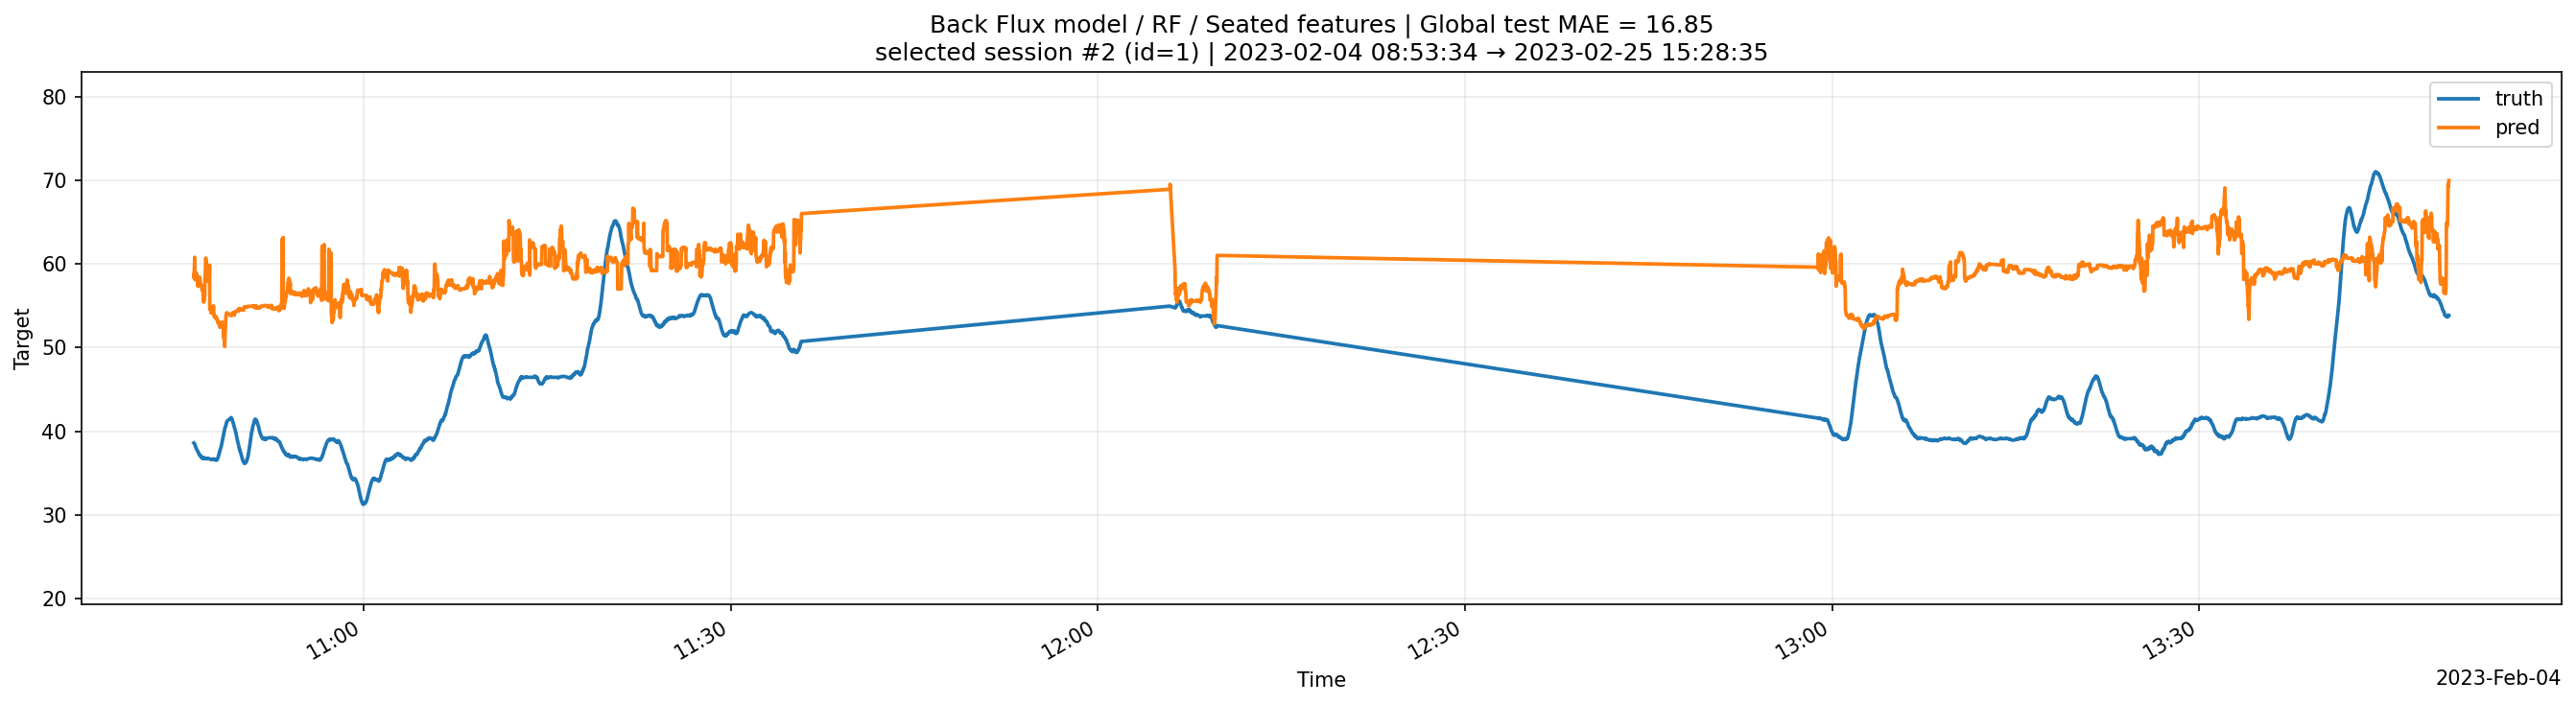

In [20]:
bundle_rf_back_seated = joblib.load('runs/RF_Back_seated.joblib')

pred_rf = predict_and_plot(bundle_rf_back_seated['model'], X_test_seated_perso, y_test_back_seated, 
                           mode="selected", title = 'Back Flux model / RF / Seated features')

### 2.3.3 Lasso (thigh heat flux)

In [24]:
# Training Ridge model for thigh flux with personal features
bundle_lasso = cv_select_and_refit_on_full_train(
    X_train=X_train_perso,
    y_train=y_train_thigh,              # DataFrame (n,1)
    base_estimator=lasso_model,
    param_grid=lasso_params,
    model_name="Lasso_Thigh_perso_seated",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Lasso_Thigh_perso_seated",
)


[Lasso_Thigh_perso_seated] Launching...
[Lasso_Thigh_perso_seated] #param combinations: 4 | outer folds: 5
  Combo 1/4: {'lasso__alpha': 0.45}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6222 ± 1.5406 | MSE mean/std: 387.7540 ± 68.5397
  Combo 2/4: {'lasso__alpha': 0.5}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6206 ± 1.5738 | MSE mean/std: 387.1410 ± 69.8017
  Combo 3/4: {'lasso__alpha': 0.55}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6214 ± 1.6082 | MSE mean/std: 386.6676 ± 71.1558
  Combo 4/4: {'lasso__alpha': 0.6}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6237 ± 1.6430 | MSE mean/std: 386.3089 ± 72.5788

[Lasso_Thigh_perso_seated] BEST params by MAE = {'lasso__alpha': 0.5}
[Lasso_Thigh_perso_seated] BEST outer MAE = 15.6206 | BEST outer MSE = 387.1410


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 


[SAVE] bundle -> runs/Lasso_Thigh_perso_seated.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


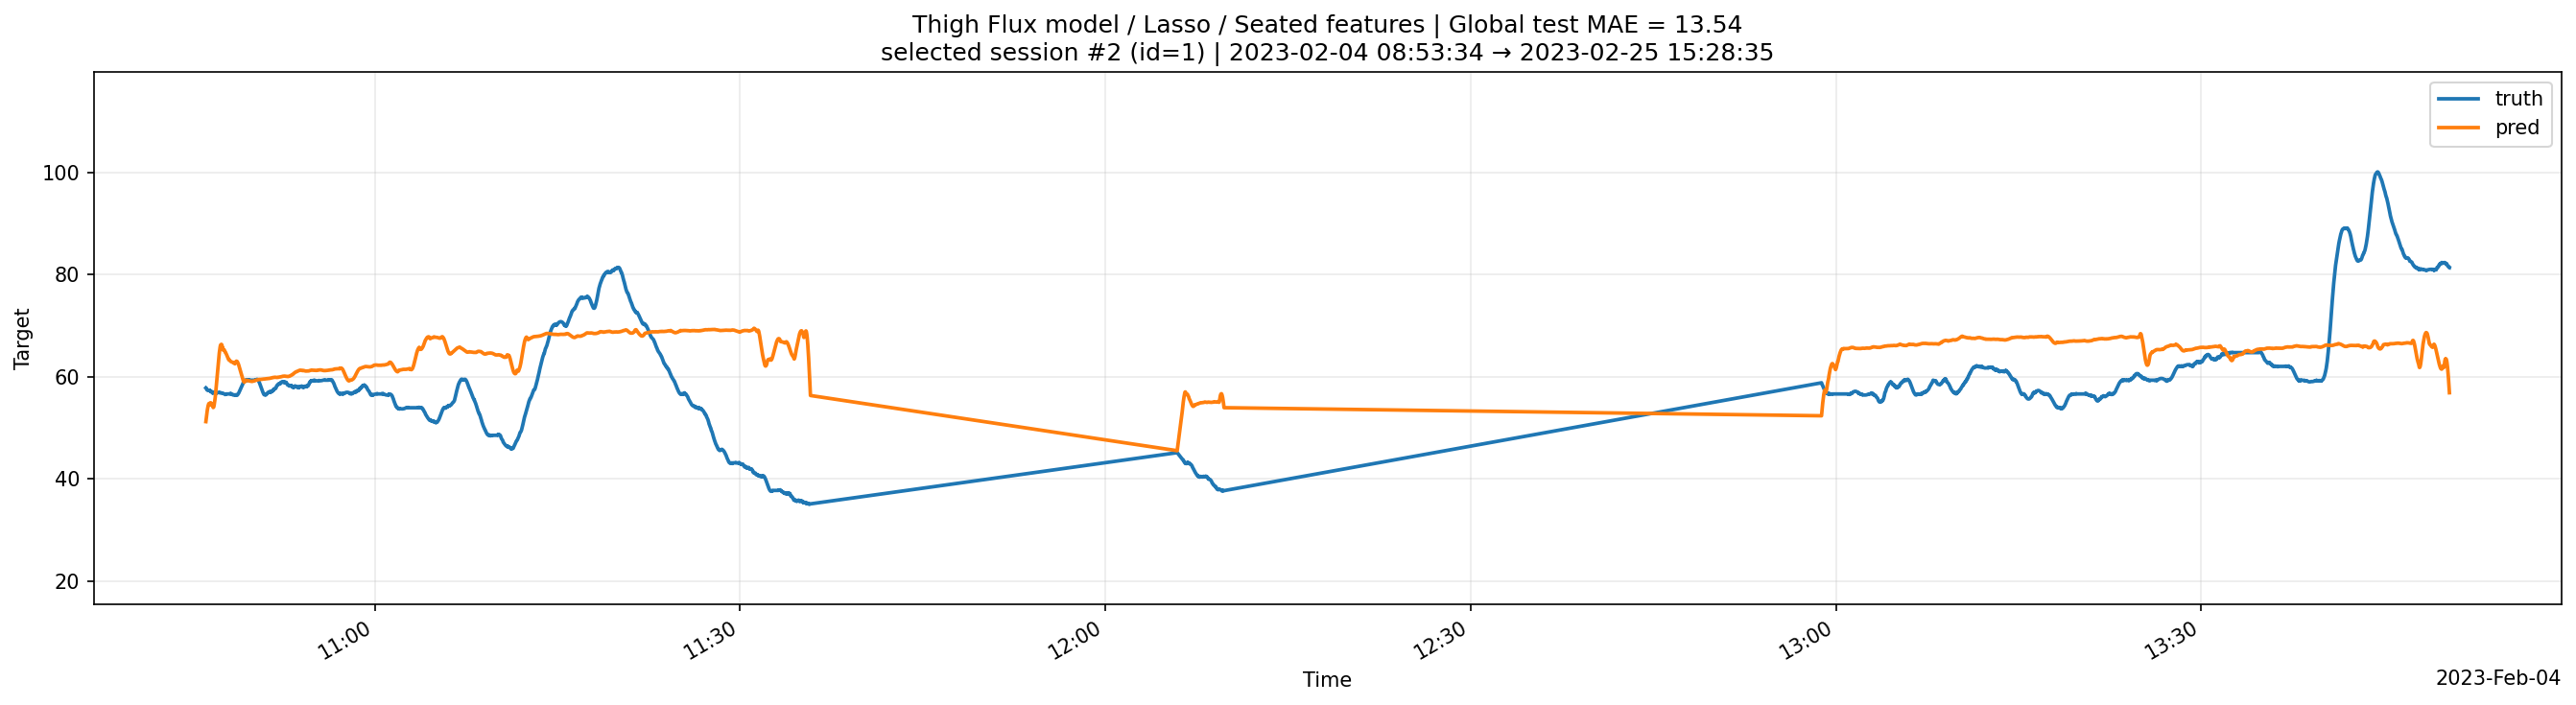

In [27]:
bundle_lasso_thigh_seated = joblib.load('runs/Lasso_Thigh_perso_seated.joblib')

pred_lasso = predict_and_plot(bundle_lasso_thigh_seated['model'], X_test_seated_perso, y_test_thigh_seated, 
                           mode="selected", title = 'Thigh Flux model / Lasso / Seated features')

### 2.3.3 Lasso (thigh heat flux)

In [28]:
# Training Ridge model for thigh flux with personal features
bundle_lasso = cv_select_and_refit_on_full_train(
    X_train=X_train_perso,
    y_train=y_train_thigh,              # DataFrame (n,1)
    base_estimator=lasso_model,
    param_grid=lasso_params,
    model_name="Lasso_Back_perso_seated",
    participant_col="participant_id",
    time_col="Time",
    n_outer_splits=5,
    drop_non_numeric=True,
    return_oof=True,
    model_title="Lasso_Back_perso_seated",
)


[Lasso_Back_perso_seated] Launching...
[Lasso_Back_perso_seated] #param combinations: 4 | outer folds: 5
  Combo 1/4: {'lasso__alpha': 0.45}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6222 ± 1.5406 | MSE mean/std: 387.7540 ± 68.5397
  Combo 2/4: {'lasso__alpha': 0.5}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6206 ± 1.5738 | MSE mean/std: 387.1410 ± 69.8017
  Combo 3/4: {'lasso__alpha': 0.55}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6214 ± 1.6082 | MSE mean/std: 386.6676 ± 71.1558
  Combo 4/4: {'lasso__alpha': 0.6}


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 

    MAE mean/std: 15.6237 ± 1.6430 | MSE mean/std: 386.3089 ± 72.5788

[Lasso_Back_perso_seated] BEST params by MAE = {'lasso__alpha': 0.5}
[Lasso_Back_perso_seated] BEST outer MAE = 15.6206 | BEST outer MSE = 387.1410


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered 


[SAVE] bundle -> runs/Lasso_Back_perso_seated.joblib


/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/mnlp_exercises/lib/python3.10/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


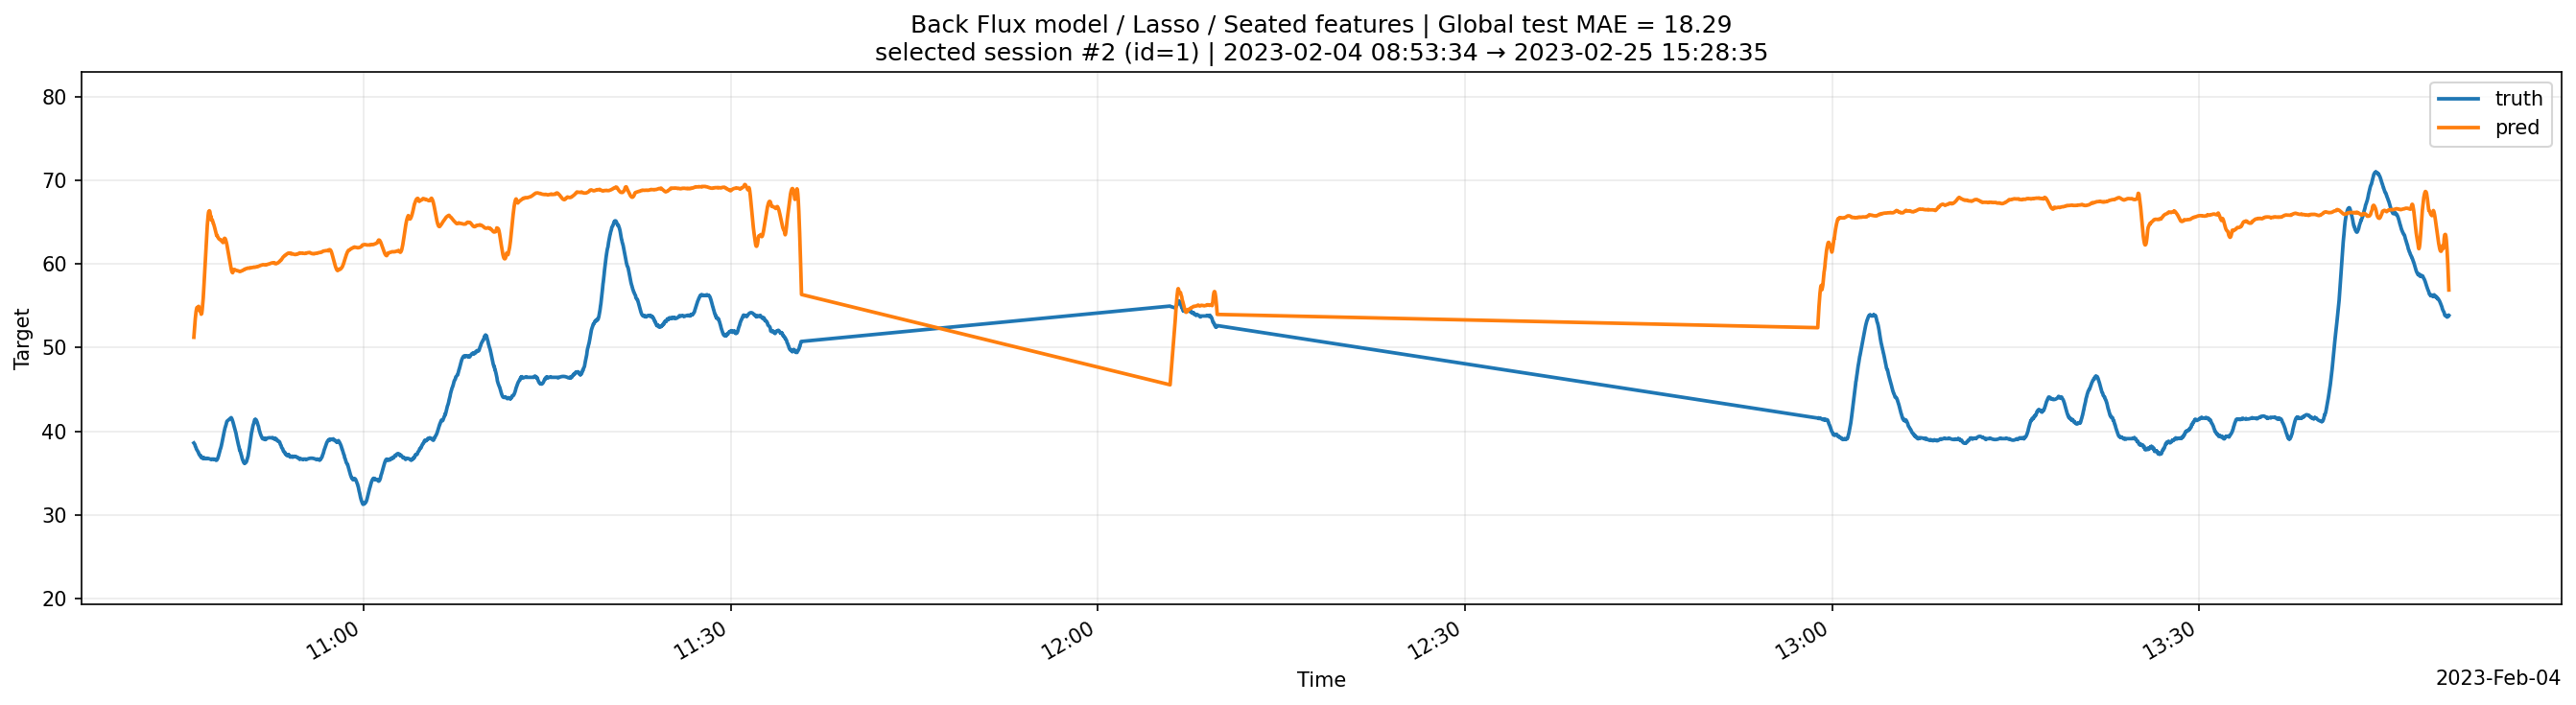

In [29]:
bundle_lasso_back_seated = joblib.load('runs/Lasso_Back_perso_seated.joblib')

pred_lasso = predict_and_plot(bundle_lasso_back_seated['model'], X_test_seated_perso, y_test_back_seated, 
                           mode="selected", title = 'Back Flux model / Lasso / Seated features')